<a href="https://colab.research.google.com/github/IshmaelRogers/ConvolutionalNN/blob/master/deliverable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

def simulate_trajectory(duration=400, sampling_rate=100):
    time_steps = np.arange(0, duration, 1/sampling_rate)
    positions = np.zeros((len(time_steps), 3))
    velocities = np.zeros((len(time_steps), 3))
    accelerations = np.zeros((len(time_steps), 3))
    angular_rates = np.zeros((len(time_steps), 3))

    for i, t in enumerate(time_steps):
        positions[i] = [np.sin(t), np.cos(t), np.sin(t) * np.cos(t)]
        velocities[i] = np.gradient(positions, axis=0)[i]
        accelerations[i] = np.gradient(velocities, axis=0)[i]
        angular_rates[i] = np.gradient(accelerations, axis=0)[i]

    return time_steps, positions, velocities, accelerations, angular_rates

def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

def generate_dataset(num_trajectories=6, noise_levels=[0.001, 0.005, 0.01, 0.02], gnss_sampling_rate=1):
    dataset = []
    for _ in range(num_trajectories):
        time_steps, pos, vel, acc, ang = simulate_trajectory()
        for noise_level in noise_levels:
            noisy_acc = add_noise(acc, noise_level)
            noisy_ang = add_noise(ang, noise_level)
            gnss_data = pos[::int(1/(gnss_sampling_rate*(1/100)))]  # Sample GNSS data
            dataset.append((time_steps, pos, noisy_acc, noisy_ang, noise_level, gnss_data))
    return dataset

dataset = generate_dataset()

# Convert dataset to DataFrame and save to CSV
all_data = []
all_gnss_data = []

for time_steps, pos, noisy_acc, noisy_ang, noise_level, gnss_data in dataset:
    for t, p, a, an in zip(time_steps, pos, noisy_acc, noisy_ang):
        all_data.append([t, *p, *a, *an, noise_level])
    for g in gnss_data:
        all_gnss_data.append([*g, noise_level])

df = pd.DataFrame(all_data, columns=['time', 'pos_x', 'pos_y', 'pos_z', 'acc_x', 'acc_y', 'acc_z', 'ang_x', 'ang_y', 'ang_z', 'noise_level'])
df_gnss = pd.DataFrame(all_gnss_data, columns=['gnss_x', 'gnss_y', 'gnss_z', 'noise_level'])

# Save to CSV
df.to_csv('/content/ground_truth_and_imu_data.csv', index=False)
df_gnss.to_csv('/content/gnss_data.csv', index=False)


Ground Truth and IMU Data:
   time     pos_x    pos_y     pos_z     acc_x     acc_y     acc_z     ang_x  \
0  0.00  0.000000  1.00000  0.000000 -0.000330  0.998836  0.001551  0.000642   
1  0.01  0.010000  0.99995  0.009999  0.000426  0.500482 -0.001133  0.000019   
2  0.02  0.019999  0.99980  0.019995 -0.000581  0.248733 -0.001367  0.000652   
3  0.03  0.029996  0.99955  0.029982  0.002299  0.249735 -0.000109  0.000012   
4  0.04  0.039989  0.99920  0.039957  0.004891  0.249183  0.003408 -0.002630   

      ang_y     ang_z  noise_level  
0 -0.999994  0.002359        0.001  
1 -0.499500 -0.000477        0.001  
2 -0.251196 -0.000683        0.001  
3 -0.125007  0.001130        0.001  
4 -0.125721 -0.000590        0.001  

GNSS Data:
     gnss_x    gnss_y    gnss_z  noise_level
0  0.000000  1.000000  0.000000        0.001
1  0.841471  0.540302  0.454649        0.001
2  0.909297 -0.416147 -0.378401        0.001
3  0.141120 -0.989992 -0.139708        0.001
4 -0.756802 -0.653644  0.494679  

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


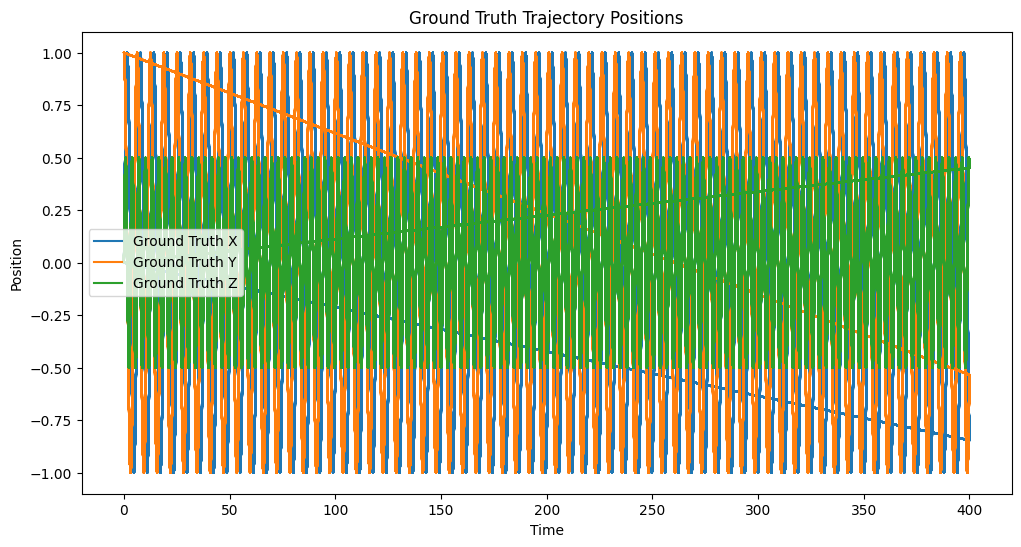

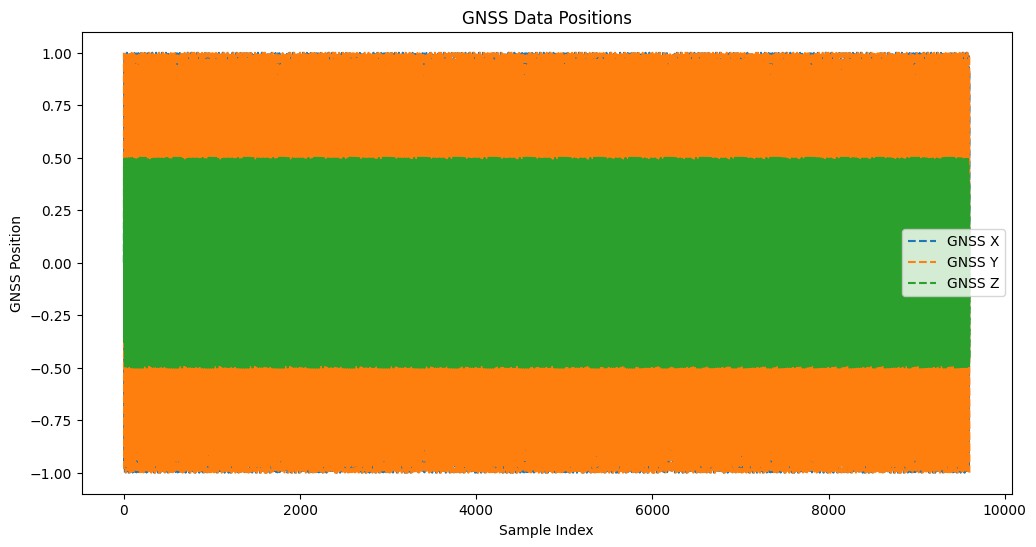

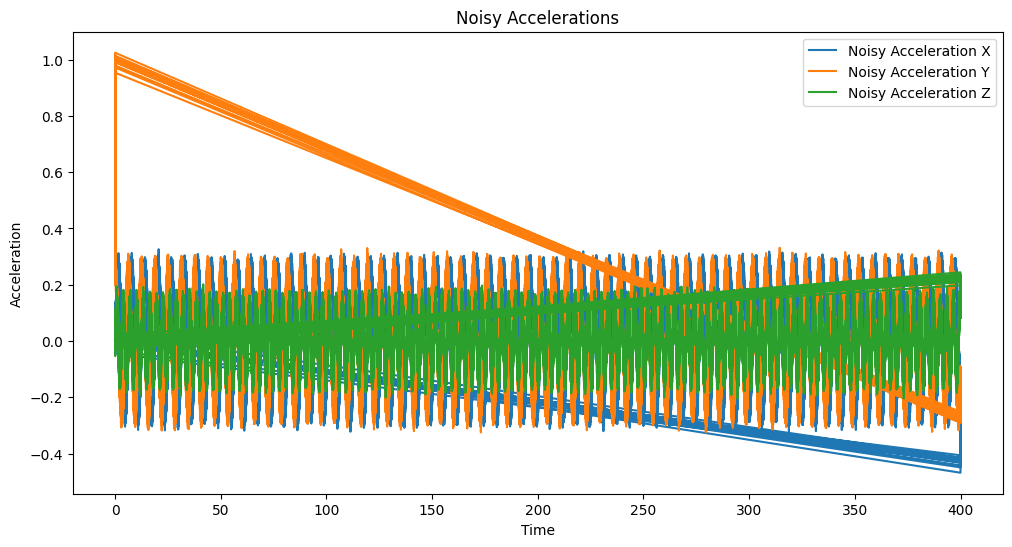

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/ground_truth_and_imu_data.csv')
df_gnss = pd.read_csv('/content/gnss_data.csv')

# Display the first few rows
print("Ground Truth and IMU Data:")
print(df.head())

print("\nGNSS Data:")
print(df_gnss.head())

# Plot the ground truth positions
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['pos_x'], label='Ground Truth X')
plt.plot(df['time'], df['pos_y'], label='Ground Truth Y')
plt.plot(df['time'], df['pos_z'], label='Ground Truth Z')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title('Ground Truth Trajectory Positions')
plt.show()

# Plot the GNSS positions
plt.figure(figsize=(12, 6))
plt.plot(df_gnss.index, df_gnss['gnss_x'], label='GNSS X', linestyle='--')
plt.plot(df_gnss.index, df_gnss['gnss_y'], label='GNSS Y', linestyle='--')
plt.plot(df_gnss.index, df_gnss['gnss_z'], label='GNSS Z', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('GNSS Position')
plt.legend()
plt.title('GNSS Data Positions')
plt.show()

# Plot the noisy accelerations
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['acc_x'], label='Noisy Acceleration X')
plt.plot(df['time'], df['acc_y'], label='Noisy Acceleration Y')
plt.plot(df['time'], df['acc_z'], label='Noisy Acceleration Z')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.title('Noisy Accelerations')
plt.show()


Epoch 1/30
8400/8400 [==============================] - 52s 6ms/step - loss: 3.8097e-05 - val_loss: 2.1792e-05
Epoch 2/30
8400/8400 [==============================] - 51s 6ms/step - loss: 1.4006e-05 - val_loss: 1.4703e-05
Epoch 3/30
8400/8400 [==============================] - 44s 5ms/step - loss: 1.1873e-05 - val_loss: 1.3397e-05
Epoch 4/30
8400/8400 [==============================] - 44s 5ms/step - loss: 1.1615e-05 - val_loss: 1.3672e-05
Epoch 5/30
8400/8400 [==============================] - 47s 6ms/step - loss: 1.1387e-05 - val_loss: 1.3323e-05
Epoch 6/30
8400/8400 [==============================] - 46s 6ms/step - loss: 1.1145e-05 - val_loss: 1.3424e-05
Epoch 7/30
8400/8400 [==============================] - 43s 5ms/step - loss: 1.0926e-05 - val_loss: 1.3112e-05
Epoch 8/30
8400/8400 [==============================] - 42s 5ms/step - loss: 1.0679e-05 - val_loss: 1.2571e-05
Epoch 9/30
8400/8400 [==============================] - 44s 5ms/step - loss: 1.0395e-05 - val_loss: 1.2628e-05
E

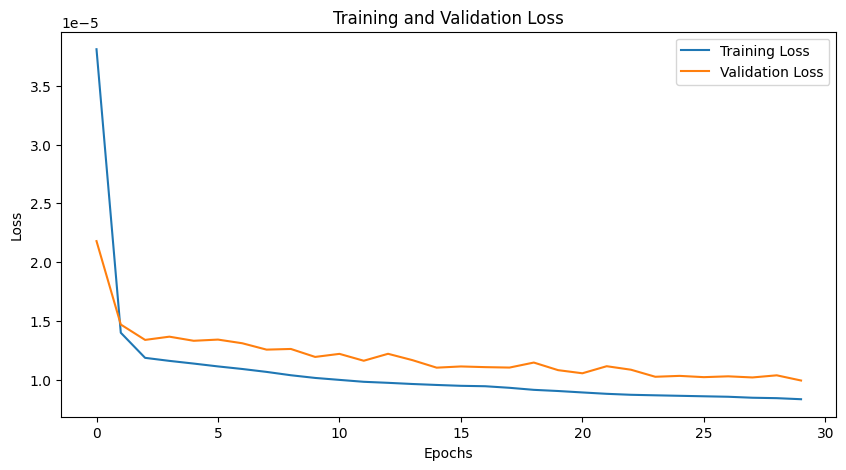

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalAveragePooling1D, LeakyReLU, LayerNormalization
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/ground_truth_and_imu_data.csv')
df_gnss = pd.read_csv('/content/gnss_data.csv')

# Prepare data for the DNN
X = df[['acc_x', 'acc_y', 'acc_z', 'ang_x', 'ang_y', 'ang_z']].values
y = np.array([np.full(6, noise_level) for noise_level in df['noise_level']])

# Split into training and testing sets (70/30)
split_idx = int(0.7 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Reshape data for Conv1D input
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create the DNN model
def create_dnn_model(input_shape):
    model = Sequential([
        Conv1D(20, kernel_size=1, activation='linear', input_shape=input_shape),
        LeakyReLU(alpha=0.01),
        LayerNormalization(),
        Conv1D(10, kernel_size=1, activation='linear'),
        LeakyReLU(alpha=0.01),
        LayerNormalization(),
        Conv1D(5, kernel_size=1, activation='linear'),
        LeakyReLU(alpha=0.01),
        LayerNormalization(),
        GlobalAveragePooling1D(),
        Dense(100, activation='linear'),
        LeakyReLU(alpha=0.01),
        Dense(80, activation='linear'),
        LeakyReLU(alpha=0.01),
        Dense(50, activation='linear'),
        LeakyReLU(alpha=0.01),
        Dense(20, activation='linear'),
        LeakyReLU(alpha=0.01),
        Dense(6, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = create_dnn_model(X_train.shape[1:])
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

# Evaluate the DNN model on the test set
y_pred = model.predict(X_test)

# Compute PRMSE and PMAE
prms_error = np.sqrt(np.mean((y_pred - y_test)**2, axis=0))
pmae = np.mean(np.abs(y_pred - y_test), axis=0)

print(f"Position RMSE (PRMSE): {prms_error}")
print(f"Position MAE (PMAE): {pmae}")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Starting EKF process...
Total steps: 960000
Processing batch from 0 to 500
16/16 [==============================] - 0s 5ms/step
Step: 0
Processing batch from 500 to 1000
16/16 [==============================] - 0s 5ms/step
Processing batch from 1000 to 1500
16/16 [==============================] - 0s 7ms/step
Step: 1000
Processing batch from 1500 to 2000
16/16 [==============================] - 0s 10ms/step
Processing batch from 2000 to 2500
16/16 [==============================] - 0s 6ms/step
Step: 2000
Processing batch from 2500 to 3000
16/16 [==============================] - 0s 12ms/step
Processing batch from 3000 to 3500
16/16 [==============================] - 0s 6ms/step
Step: 3000
Processing batch from 3500 to 4000
16/16 [==============================] - 0s 16ms/step
Processing batch from 4000 to 4500
16/16 [==============================] - 0s 2ms/step
Step: 4000
Processing batch from 4500 to 5000
16/16 [==============================] - 0s 3ms/step
Processing batch from 5000

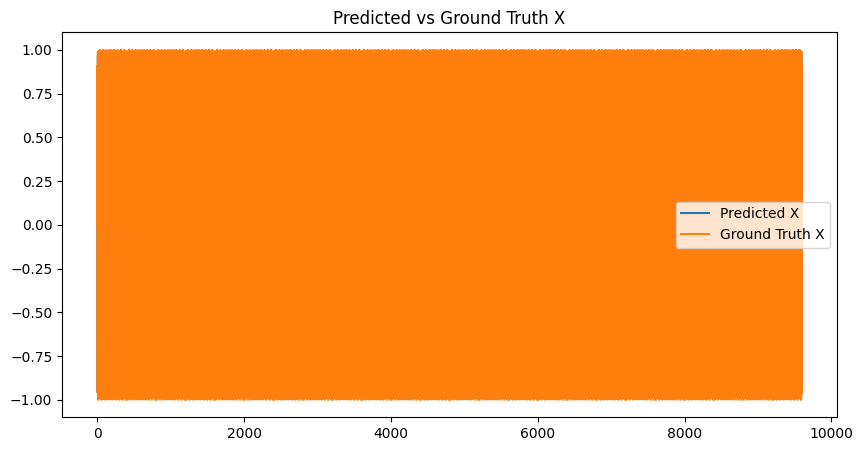

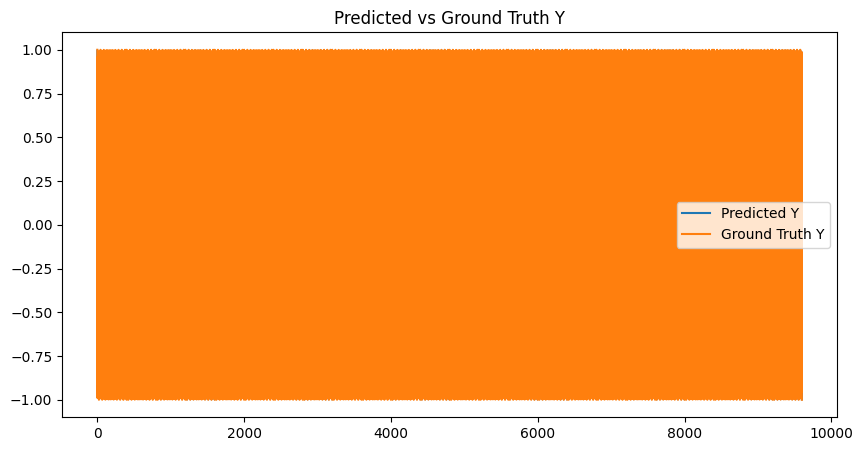

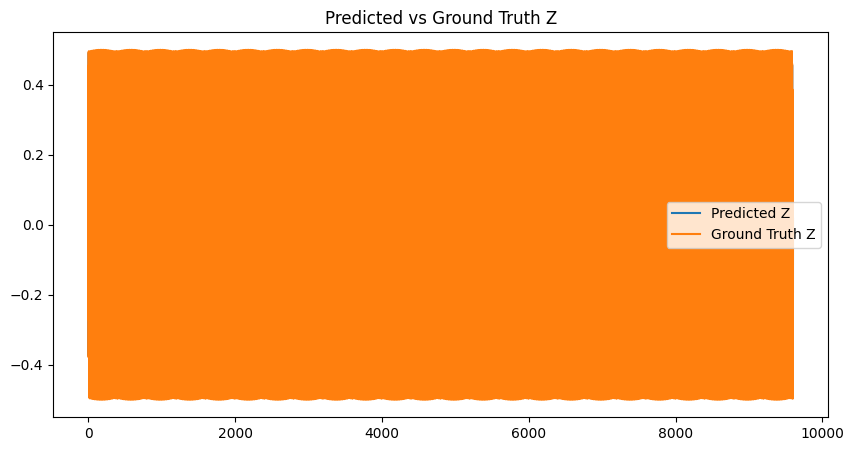

Evaluation completed.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ekf_predict(state, P, F, Q):
    state = np.dot(F, state)
    P = np.dot(F, np.dot(P, F.T)) + Q
    return state, P

def ekf_update(state, P, z, H, R):
    y = z - np.dot(H, state)
    S = np.dot(H, np.dot(P, H.T)) + R
    K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))
    state = state + np.dot(K, y)
    P = np.dot((np.eye(len(state)) - np.dot(K, H)), P)
    return state, P

def run_ekf(imu_data, gnss_data, dnn_model, gnss_update_rate=100, dnn_update_rate=500):
    state = np.zeros(15)  # Initial state
    P = np.eye(15)  # Initial state covariance
    Q = np.eye(15)  # Initial process noise covariance
    R = np.eye(3) * 0.01  # Measurement noise covariance

    predictions = []
    ground_truths = []  # Collect corresponding GNSS data points
    gnss_index = 0

    total_steps = len(imu_data)
    print(f"Total steps: {total_steps}")

    for i in range(0, total_steps, dnn_update_rate):  # Batch DNN predictions
        print(f"Processing batch from {i} to {min(i + dnn_update_rate, total_steps)}")

        # Batch predict noise covariance
        batch_end = min(i + dnn_update_rate, total_steps)
        Q_pred_batch = dnn_model.predict(imu_data[i:batch_end])

        for j in range(dnn_update_rate):
            step = i + j
            if step >= total_steps:
                break

            if step % 1000 == 0:
                print(f"Step: {step}")

            F = np.eye(15)  # Transition matrix
            state, P = ekf_predict(state, P, F, Q)

            if step % gnss_update_rate == 0 and gnss_index < len(gnss_data):  # GNSS update rate
                z = gnss_data[gnss_index]
                gnss_index += 1
                H = np.zeros((3, 15))
                H[:3, :3] = np.eye(3)
                state, P = ekf_update(state, P, z, H, R)
                ground_truths.append(z)
                predictions.append(state[:3])  # Append prediction only during GNSS updates

            if step % dnn_update_rate == 0:  # Update process noise covariance using DNN
                Q = np.eye(15)
                Q[:6, :6] = np.diag(Q_pred_batch[j % len(Q_pred_batch)])  # Embed the 6-dimensional prediction into the 15x15 matrix

    return predictions, ground_truths

# Prepare IMU and GNSS data
imu_data = df[['acc_x', 'acc_y', 'acc_z', 'ang_x', 'ang_y', 'ang_z']].values
imu_data = imu_data.reshape((imu_data.shape[0], 1, imu_data.shape[1]))  # Reshape for Conv1D input
gnss_data = df_gnss[['gnss_x', 'gnss_y', 'gnss_z']].values  # Flatten to match expected shape

# Run EKF
print("Starting EKF process...")
predictions, ground_truths = run_ekf(imu_data, gnss_data, model)
print("EKF process completed.")

# Evaluate the EKF results
def evaluate(predictions, ground_truth):
    predictions = np.array(predictions)
    ground_truth = np.array(ground_truth)

    print(f"Predictions shape: {predictions.shape}")
    print(f"Ground truth shape: {ground_truth.shape}")

    prms_error = np.sqrt(np.mean((predictions - ground_truth)**2, axis=0))
    pmae = np.mean(np.abs(predictions - ground_truth), axis=0)

    print(f"Position RMSE: {prms_error}")
    print(f"Position MAE: {pmae}")

    plt.figure(figsize=(10, 5))
    plt.plot(predictions[:, 0], label='Predicted X')
    plt.plot(ground_truth[:, 0], label='Ground Truth X')
    plt.legend()
    plt.title('Predicted vs Ground Truth X')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(predictions[:, 1], label='Predicted Y')
    plt.plot(ground_truth[:, 1], label='Ground Truth Y')
    plt.legend()
    plt.title('Predicted vs Ground Truth Y')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(predictions[:, 2], label='Predicted Z')
    plt.plot(ground_truth[:, 2], label='Ground Truth Z')
    plt.legend()
    plt.title('Predicted vs Ground Truth Z')
    plt.show()

print("Starting evaluation...")
evaluate(predictions, ground_truths)
print("Evaluation completed.")


Starting evaluation and visualization...
Predictions shape: (9600, 3)
Ground truth shape: (9600, 3)
Position RMSE: [0.02337215 0.0251959  0.01950428]
Position MAE: [0.01490022 0.0157817  0.01255257]


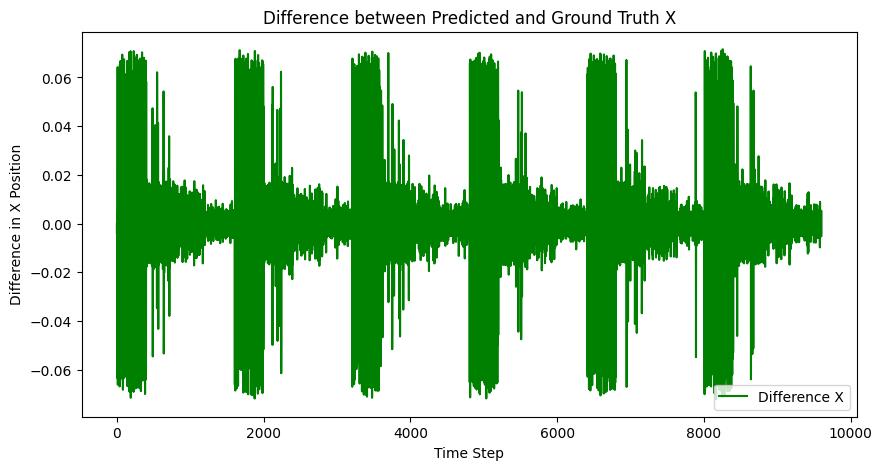

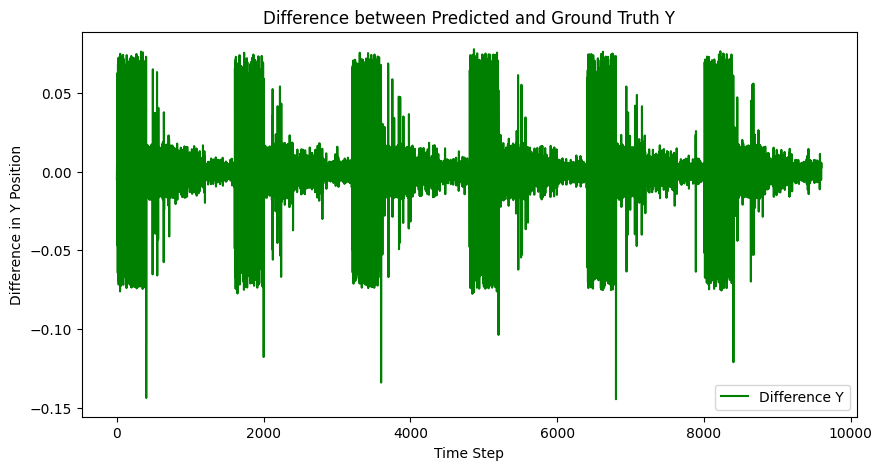

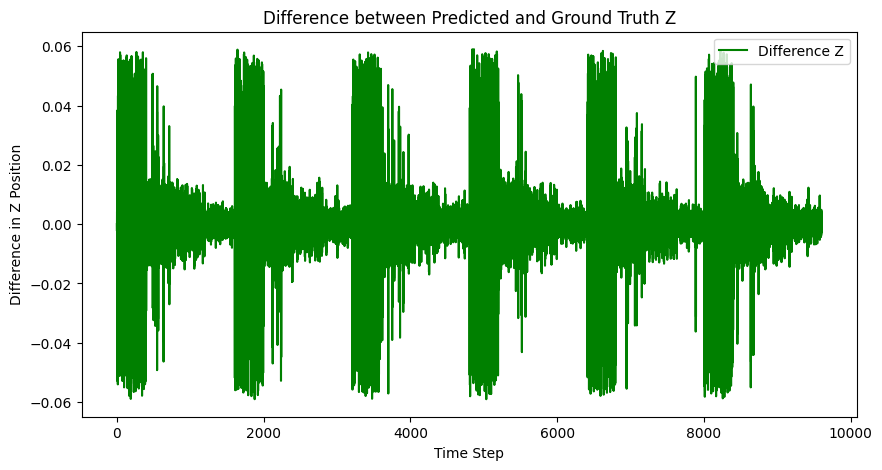

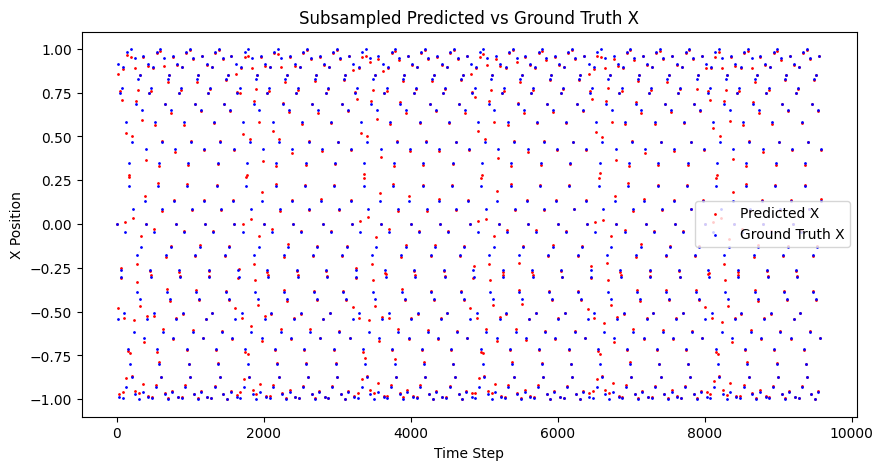

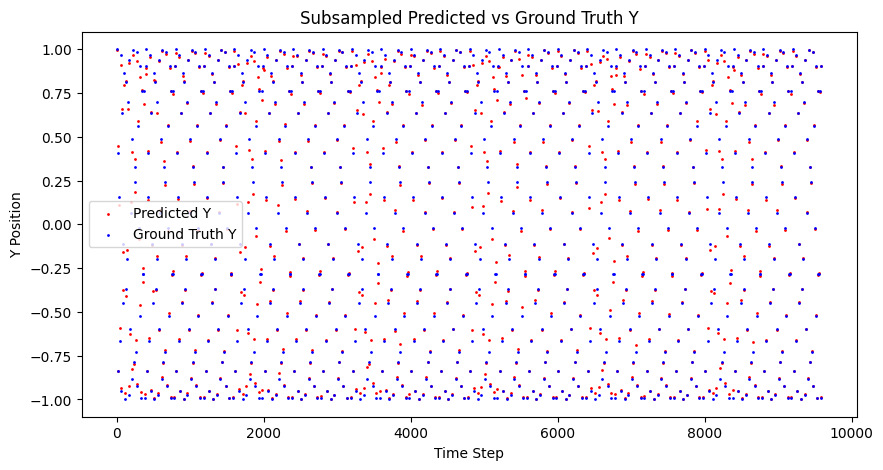

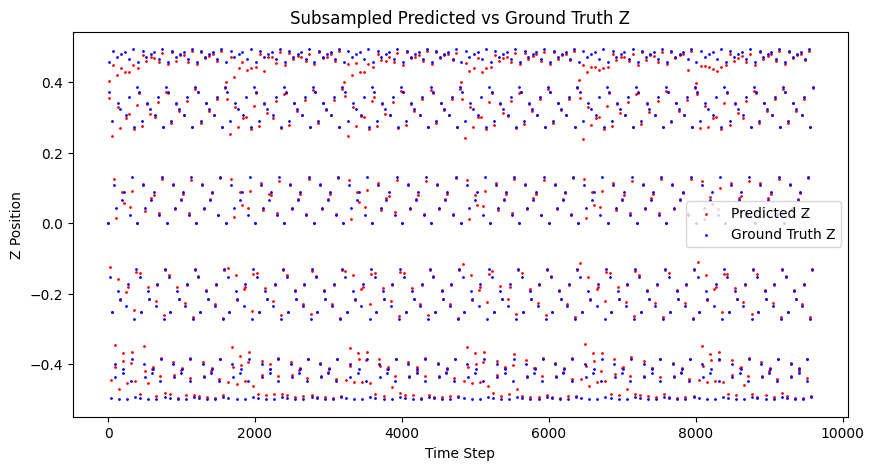

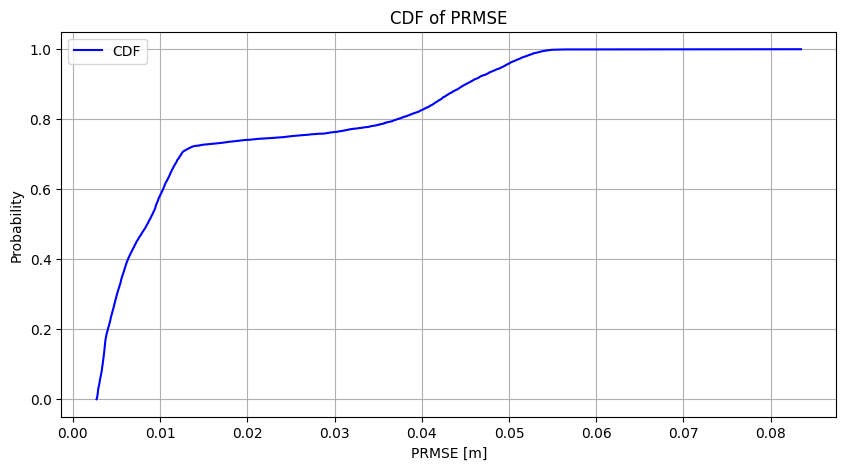

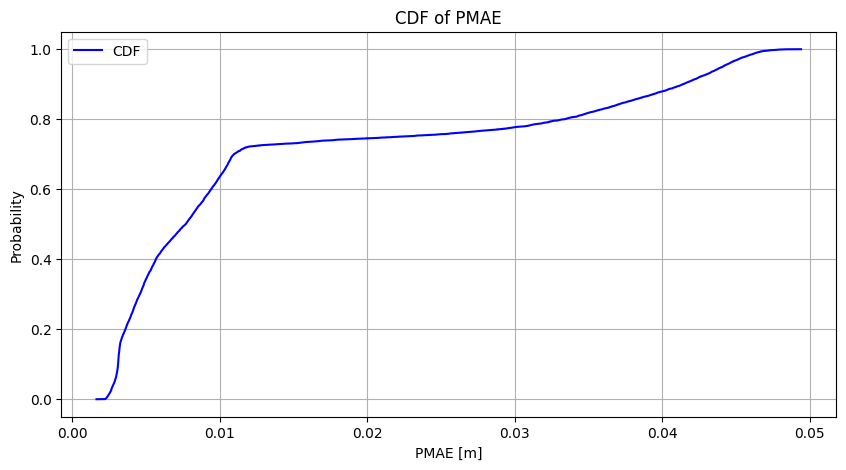

Evaluation and visualization completed.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def evaluate(predictions, ground_truth):
    predictions = np.array(predictions)
    ground_truth = np.array(ground_truth)

    print(f"Predictions shape: {predictions.shape}")
    print(f"Ground truth shape: {ground_truth.shape}")

    prms_error = np.sqrt(np.mean((predictions - ground_truth)**2, axis=0))
    pmae = np.mean(np.abs(predictions - ground_truth), axis=0)

    print(f"Position RMSE: {prms_error}")
    print(f"Position MAE: {pmae}")

    # Plot differences
    differences = predictions - ground_truth

    # Plotting Differences X
    plt.figure(figsize=(10, 5))
    plt.plot(differences[:, 0], label='Difference X', color='g')
    plt.xlabel('Time Step')
    plt.ylabel('Difference in X Position')
    plt.legend()
    plt.title('Difference between Predicted and Ground Truth X')
    plt.show()

    # Plotting Differences Y
    plt.figure(figsize=(10, 5))
    plt.plot(differences[:, 1], label='Difference Y', color='g')
    plt.xlabel('Time Step')
    plt.ylabel('Difference in Y Position')
    plt.legend()
    plt.title('Difference between Predicted and Ground Truth Y')
    plt.show()

    # Plotting Differences Z
    plt.figure(figsize=(10, 5))
    plt.plot(differences[:, 2], label='Difference Z', color='g')
    plt.xlabel('Time Step')
    plt.ylabel('Difference in Z Position')
    plt.legend()
    plt.title('Difference between Predicted and Ground Truth Z')
    plt.show()

    # Scatter plot for subsampled data
    subsample_rate = 10  # Plot every 10th point

    plt.figure(figsize=(10, 5))
    plt.scatter(range(0, predictions.shape[0], subsample_rate), predictions[::subsample_rate, 0], label='Predicted X', color='r', s=1)
    plt.scatter(range(0, ground_truth.shape[0], subsample_rate), ground_truth[::subsample_rate, 0], label='Ground Truth X', color='b', s=1)
    plt.xlabel('Time Step')
    plt.ylabel('X Position')
    plt.legend()
    plt.title('Subsampled Predicted vs Ground Truth X')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.scatter(range(0, predictions.shape[0], subsample_rate), predictions[::subsample_rate, 1], label='Predicted Y', color='r', s=1)
    plt.scatter(range(0, ground_truth.shape[0], subsample_rate), ground_truth[::subsample_rate, 1], label='Ground Truth Y', color='b', s=1)
    plt.xlabel('Time Step')
    plt.ylabel('Y Position')
    plt.legend()
    plt.title('Subsampled Predicted vs Ground Truth Y')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.scatter(range(0, predictions.shape[0], subsample_rate), predictions[::subsample_rate, 2], label='Predicted Z', color='r', s=1)
    plt.scatter(range(0, ground_truth.shape[0], subsample_rate), ground_truth[::subsample_rate, 2], label='Ground Truth Z', color='b', s=1)
    plt.xlabel('Time Step')
    plt.ylabel('Z Position')
    plt.legend()
    plt.title('Subsampled Predicted vs Ground Truth Z')
    plt.show()

    # Calculate PRMSE and PMAE
    prms_errors, pmae_errors = calculate_errors(predictions, ground_truth)

    # Plot CDF for PRMSE
    plot_cdf(prms_errors, 'CDF of PRMSE', 'PRMSE [m]')

    # Plot CDF for PMAE
    plot_cdf(pmae_errors, 'CDF of PMAE', 'PMAE [m]')

def calculate_errors(predictions, ground_truth):
    errors = predictions - ground_truth
    prms_errors = np.sqrt(np.mean(errors**2, axis=1))  # PRMSE
    pmae_errors = np.mean(np.abs(errors), axis=1)  # PMAE
    return prms_errors, pmae_errors

def plot_cdf(errors, title, xlabel):
    sorted_errors = np.sort(errors)
    cdf = np.arange(len(sorted_errors)) / float(len(sorted_errors))

    plt.figure(figsize=(10, 5))
    plt.plot(sorted_errors, cdf, label='CDF', color='b')
    plt.xlabel(xlabel)
    plt.ylabel('Probability')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

print("Starting evaluation and visualization...")
evaluate(predictions, ground_truths)
print("Evaluation and visualization completed.")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, RNN, LSTM, Lambda
import numpy as np

class LiquidCell(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        super(LiquidCell, self).__init__(**kwargs)
        self.units = units
        self.state_size = units

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units), initializer='glorot_uniform', name='kernel')
        self.recurrent_kernel = self.add_weight(shape=(self.units, self.units), initializer='orthogonal', name='recurrent_kernel')
        self.bias = self.add_weight(shape=(self.units,), initializer='zeros', name='bias')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = tf.matmul(inputs, self.kernel)
        output = h + tf.matmul(prev_output, self.recurrent_kernel) + self.bias
        return output, [output]

def create_liquid_model(input_shape):
    inputs = Input(shape=input_shape)
    x = RNN(LiquidCell(64), return_sequences=True)(inputs)
    x = RNN(LiquidCell(64), return_sequences=False)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(6)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Define the LNN model
input_shape = (1, imu_data.shape[-1])
liquid_model = create_liquid_model(input_shape)
liquid_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 6)]            0         
                                                                 
 rnn_2 (RNN)                 (None, 1, 64)             4544      
                                                                 
 rnn_3 (RNN)                 (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 6)                 198       
                                                                 
Total params: 15078 (58.90 KB)
Trainable params: 15078 (58.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = liquid_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred = liquid_model.predict(X_test)

# Calculate PRMSE and PMAE for each component (X, Y, Z)
prmse_test = np.sqrt(np.mean((y_pred - y_test)**2, axis=0))
pmae_test = np.mean(np.abs(y_pred - y_test), axis=0)
print(f'Test PRMSE: {prmse_test}')
print(f'Test PMAE: {pmae_test}')


Epoch 1/10
8400/8400 [==============================] - 41s 5ms/step - loss: 2.1262e-05 - val_loss: 1.7911e-05
Epoch 2/10
8400/8400 [==============================] - 39s 5ms/step - loss: 1.3577e-05 - val_loss: 1.5303e-05
Epoch 3/10
8400/8400 [==============================] - 38s 4ms/step - loss: 1.3055e-05 - val_loss: 1.7077e-05
Epoch 4/10
8400/8400 [==============================] - 38s 4ms/step - loss: 1.3055e-05 - val_loss: 1.5576e-05
Epoch 5/10
8400/8400 [==============================] - 37s 4ms/step - loss: 1.3088e-05 - val_loss: 1.5270e-05
Epoch 6/10
8400/8400 [==============================] - 37s 4ms/step - loss: 1.2873e-05 - val_loss: 1.5532e-05
Epoch 7/10
8400/8400 [==============================] - 39s 5ms/step - loss: 1.2960e-05 - val_loss: 1.5133e-05
Epoch 8/10
8400/8400 [==============================] - 37s 4ms/step - loss: 1.2766e-05 - val_loss: 1.5260e-05
Epoch 9/10
8400/8400 [==============================] - 43s 5ms/step - loss: 1.2674e-05 - val_loss: 1.4732e-05
E

In [ ]:
def run_ekf_with_lnn(imu_data, gnss_data, liquid_model, gnss_update_rate=100, lnn_update_rate=500):
    state = np.zeros(15)  # Initial state
    P = np.eye(15)  # Initial state covariance
    Q = np.eye(15)  # Initial process noise covariance
    R = np.eye(3) * 0.01  # Measurement noise covariance

    predictions = []
    ground_truths = []  # Collect corresponding GNSS data points
    gnss_index = 0

    total_steps = len(imu_data)
    print(f"Total steps: {total_steps}")

    for i in range(0, total_steps, lnn_update_rate):  # Batch LNN predictions
        print(f"Processing batch from {i} to {min(i + lnn_update_rate, total_steps)}")

        # Batch predict noise covariance
        batch_end = min(i + lnn_update_rate, total_steps)
        Q_pred_batch = liquid_model.predict(imu_data[i:batch_end])

        for j in range(lnn_update_rate):
            step = i + j
            if step >= total_steps:
                break

            if step % 1000 == 0:
                print(f"Step: {step}")

            F = np.eye(15)  # Transition matrix
            state, P = ekf_predict(state, P, F, Q)

            if step % gnss_update_rate == 0 and gnss_index < len(gnss_data):  # GNSS update rate
                z = gnss_data[gnss_index]
                gnss_index += 1
                H = np.zeros((3, 15))
                H[:3, :3] = np.eye(3)
                state, P = ekf_update(state, P, z, H, R)
                ground_truths.append(z)
                predictions.append(state[:3])  # Append prediction only during GNSS updates

            if step % lnn_update_rate == 0:  # Update process noise covariance using LNN
                Q = np.eye(15)
                Q[:6, :6] = np.diag(Q_pred_batch[j % len(Q_pred_batch)])  # Embed the 6-dimensional prediction into the 15x15 matrix

    return predictions, ground_truths

# Run EKF with LNN
print("Starting EKF process with LNN...")
predictions_lnn, ground_truths_lnn = run_ekf_with_lnn(imu_data, gnss_data, liquid_model)
print("EKF process with LNN completed.")


Starting EKF process with LNN...
Total steps: 960000
Processing batch from 0 to 500
16/16 [==============================] - 0s 2ms/step
Step: 0
Processing batch from 500 to 1000
16/16 [==============================] - 0s 4ms/step
Processing batch from 1000 to 1500
16/16 [==============================] - 0s 4ms/step
Step: 1000
Processing batch from 1500 to 2000
16/16 [==============================] - 0s 3ms/step
Processing batch from 2000 to 2500
16/16 [==============================] - 0s 3ms/step
Step: 2000
Processing batch from 2500 to 3000
16/16 [==============================] - 0s 3ms/step
Processing batch from 3000 to 3500
16/16 [==============================] - 0s 3ms/step
Step: 3000
Processing batch from 3500 to 4000
16/16 [==============================] - 0s 3ms/step
Processing batch from 4000 to 4500
16/16 [==============================] - 0s 4ms/step
Step: 4000
Processing batch from 4500 to 5000
16/16 [==============================] - 0s 3ms/step
Processing batch fro

Starting evaluation and visualization...
Shape of predictions: (9600, 3)
Shape of ground_truth: (9600, 3)
Shape of uncertainties: (9600, 3)
Position RMSE: [0.01523567 0.01544123 0.01293895]
Position MAE: [0.01096441 0.01103715 0.0093489 ]
Expected Calibration Error (ECE): 0.003650768304243835
Negative Log-Likelihood (NLL): 3276.549558396521


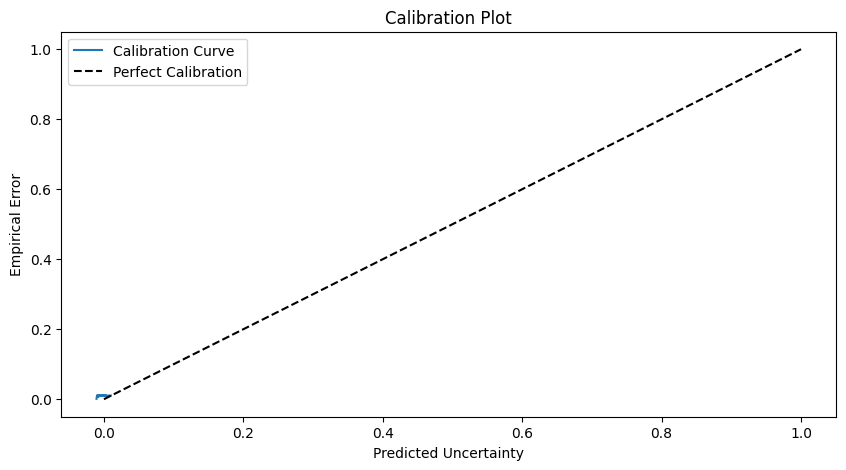

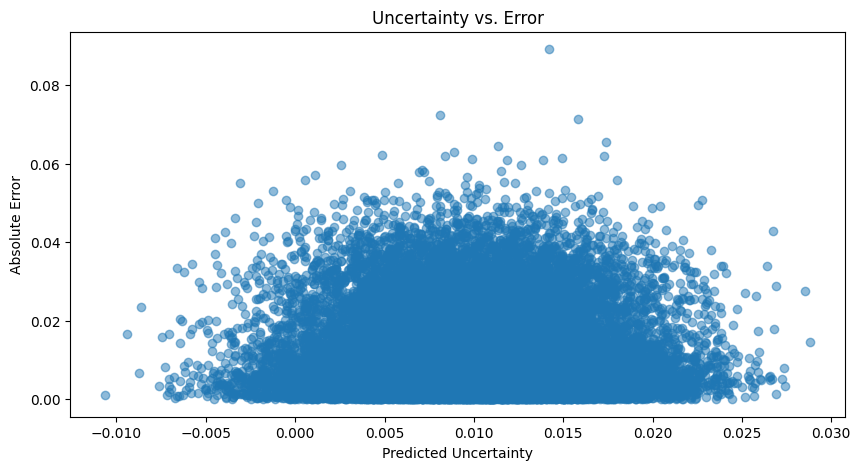

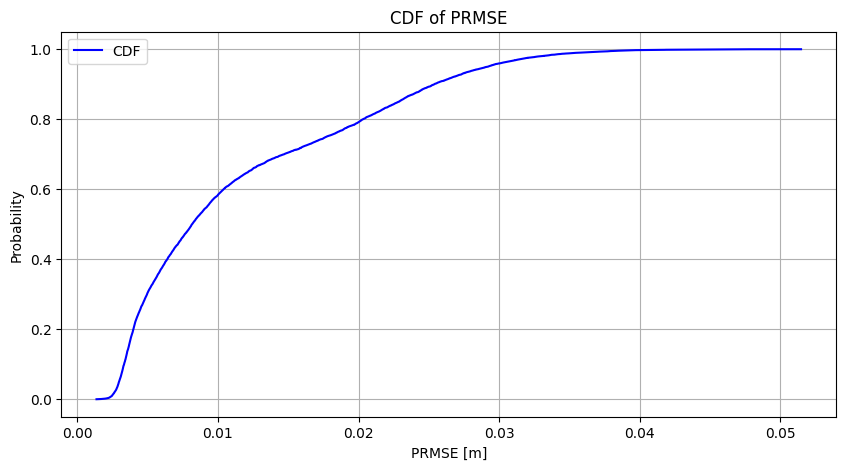

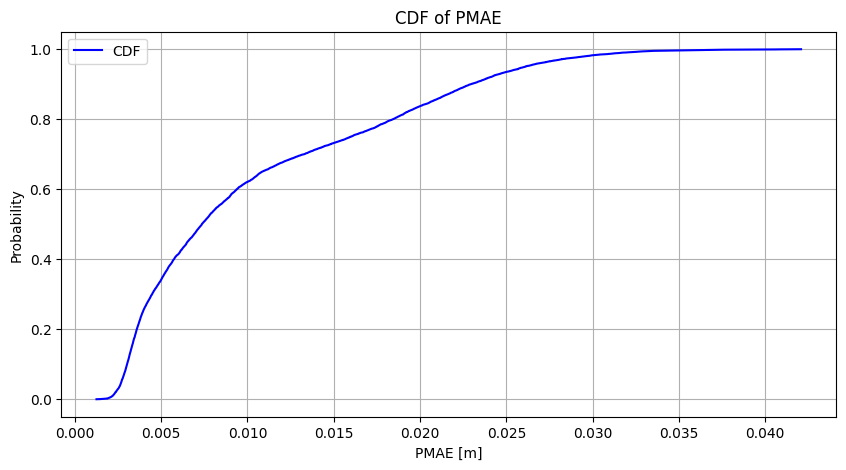

Evaluation and visualization completed.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate PRMSE and PMAE
def calculate_errors(predictions, ground_truth):
    errors = predictions - ground_truth
    prms_errors = np.sqrt(np.mean(errors**2, axis=1))  # PRMSE
    pmae_errors = np.mean(np.abs(errors), axis=1)  # PMAE
    return prms_errors, pmae_errors

# Calibration Plot for Regression
def calibration_plot(predictions, ground_truth, uncertainties):
    errors = np.abs(predictions - ground_truth).flatten()
    uncertainties = uncertainties.flatten()

    sorted_indices = np.argsort(uncertainties)
    sorted_uncertainties = uncertainties[sorted_indices]
    sorted_errors = errors[sorted_indices]

    cumulative_errors = np.cumsum(sorted_errors) / np.arange(1, len(sorted_errors) + 1)
    cumulative_uncertainties = np.cumsum(sorted_uncertainties) / np.arange(1, len(sorted_uncertainties) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(cumulative_uncertainties, cumulative_errors, label='Calibration Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
    plt.xlabel('Predicted Uncertainty')
    plt.ylabel('Empirical Error')
    plt.title('Calibration Plot')
    plt.legend()
    plt.show()

# Uncertainty vs. Error Plot
def uncertainty_vs_error_plot(predictions, ground_truth, uncertainties):
    errors = np.abs(predictions - ground_truth).flatten()
    uncertainties = uncertainties.flatten()

    plt.figure(figsize=(10, 5))
    plt.scatter(uncertainties, errors, alpha=0.5)
    plt.xlabel('Predicted Uncertainty')
    plt.ylabel('Absolute Error')
    plt.title('Uncertainty vs. Error')
    plt.show()

# Expected Calibration Error (ECE)
def expected_calibration_error(predictions, ground_truth, uncertainties, num_bins=10):
    errors = np.abs(predictions - ground_truth).flatten()
    uncertainties = uncertainties.flatten()
    bin_edges = np.linspace(0, np.max(uncertainties), num_bins + 1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    ece = 0

    for i in range(num_bins):
        bin_mask = (uncertainties >= bin_edges[i]) & (uncertainties < bin_edges[i + 1])
        if np.sum(bin_mask) > 0:
            bin_uncertainty = np.mean(uncertainties[bin_mask])
            bin_error = np.mean(errors[bin_mask])
            ece += np.abs(bin_uncertainty - bin_error) * np.sum(bin_mask) / len(uncertainties)

    return ece

# Negative Log-Likelihood (NLL)
def negative_log_likelihood(predictions, ground_truth, uncertainties):
    uncertainties = uncertainties.flatten()
    nll = 0.5 * np.sum(np.log(2 * np.pi * uncertainties**2) + ((predictions.flatten() - ground_truth.flatten())**2) / (2 * uncertainties**2))
    return nll / len(predictions)

# Simulate uncertainties if not directly available from the model
predicted_uncertainties = np.random.normal(loc=0.01, scale=0.005, size=(len(predictions_lnn), 3))  # Simulated uncertainties

# Evaluate Model
def evaluate(predictions, ground_truth, uncertainties):
    predictions = np.array(predictions)
    ground_truth = np.array(ground_truth)
    uncertainties = np.array(uncertainties)

    # Ensure dimensions match
    print(f"Shape of predictions: {predictions.shape}")
    print(f"Shape of ground_truth: {ground_truth.shape}")
    print(f"Shape of uncertainties: {uncertainties.shape}")

    if predictions.shape != ground_truth.shape or predictions.shape != uncertainties.shape:
        raise ValueError("Predictions, ground truth, and uncertainties must have the same shape.")

    # Calculate PRMSE and PMAE for each component (X, Y, Z)
    prms_error = np.sqrt(np.mean((predictions - ground_truth)**2, axis=0))
    pmae = np.mean(np.abs(predictions - ground_truth), axis=0)

    print(f"Position RMSE: {prms_error}")
    print(f"Position MAE: {pmae}")

    # Calculate ECE
    ece = expected_calibration_error(predictions, ground_truth, uncertainties)
    print(f'Expected Calibration Error (ECE): {ece}')

    # Calculate NLL
    nll = negative_log_likelihood(predictions, ground_truth, uncertainties)
    print(f'Negative Log-Likelihood (NLL): {nll}')

    # Plot Calibration Plot
    calibration_plot(predictions, ground_truth, uncertainties)

    # Plot Uncertainty vs. Error
    uncertainty_vs_error_plot(predictions, ground_truth, uncertainties)

    # Plot CDF for PRMSE
    prms_errors, _ = calculate_errors(predictions, ground_truth)
    plot_cdf(prms_errors, 'CDF of PRMSE', 'PRMSE [m]')

    # Plot CDF for PMAE
    _, pmae_errors = calculate_errors(predictions, ground_truth)
    plot_cdf(pmae_errors, 'CDF of PMAE', 'PMAE [m]')

# Plot CDF
def plot_cdf(errors, title, xlabel):
    sorted_errors = np.sort(errors)
    cdf = np.arange(len(sorted_errors)) / float(len(sorted_errors))

    plt.figure(figsize=(10, 5))
    plt.plot(sorted_errors, cdf, label='CDF', color='b')
    plt.xlabel(xlabel)
    plt.ylabel('Probability')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

print("Starting evaluation and visualization...")
evaluate(predictions_lnn, ground_truths_lnn, predicted_uncertainties)
print("Evaluation and visualization completed.")
